In [11]:
import numpy as np
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [7]:
pretrained_model = load_model(os.path.join(os.getcwd(),'.yoloface','face_detection.h5'), compile=False)

In [8]:
pretrained_model.trainable = False

In [27]:
decode_predictions = pretrained_model.c

AttributeError: 'Functional' object has no attribute 'decode_predictions'

In [18]:
def preprocess(img):
    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)
    blob = np.transpose(blob, (0,2,3,1))
    return tf.convert_to_tensor(blob)

In [25]:
def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

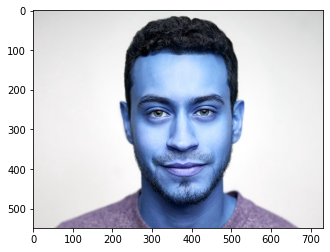

In [22]:
image_path='face.jpg'
image=cv2.imread(image_path)
plt.imshow(image)

In [23]:
image = preprocess(image)
image_probs = pretrained_model.predict(image)

NameError: name 'decode_predictions' is not defined

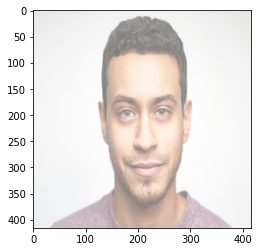

In [26]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()